In [2]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [3]:
create_pngs_from_wavs('Sounds/background', 'Spectrograms/background')

In [4]:
create_pngs_from_wavs('Sounds/chainsaw', 'Spectrograms/chainsaw')

In [5]:
create_pngs_from_wavs('Sounds/engine', 'Spectrograms/engine')

In [6]:
create_pngs_from_wavs('Sounds/storm', 'Spectrograms/storm')

In [7]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

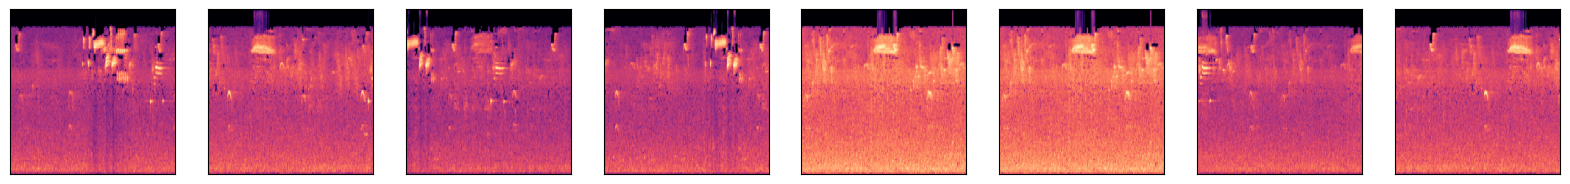

In [8]:
images, labels = load_images_from_path('Spectrograms/background', 0)
show_images(images)
    
x += images
y += labels

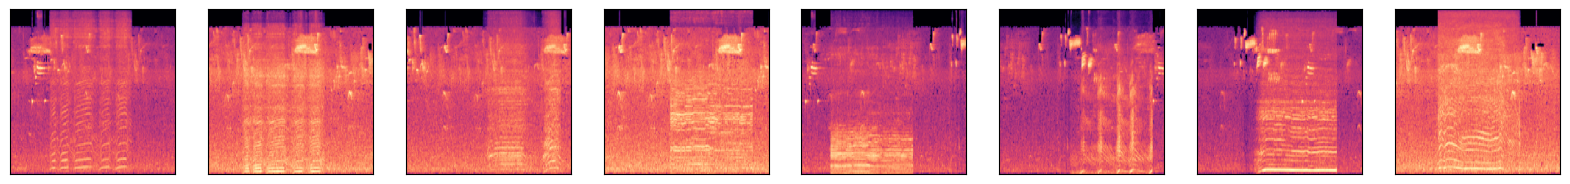

In [9]:
images, labels = load_images_from_path('Spectrograms/chainsaw', 1)
show_images(images)
    
x += images
y += labels

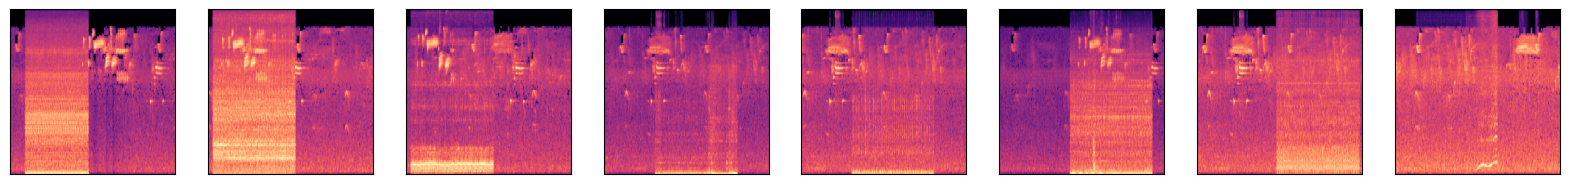

In [10]:
images, labels = load_images_from_path('Spectrograms/engine', 2)
show_images(images)
    
x += images
y += labels

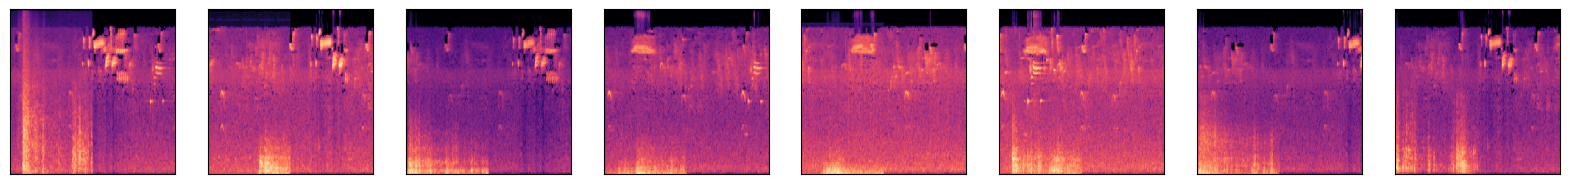

In [11]:
images, labels = load_images_from_path('Spectrograms/storm', 3)
show_images(images)
    
x += images
y += labels

In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,212,548 (73.29 MB)

 Trainable params: 19,212,548 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 883ms/step - accuracy: 0.2586 - loss: 1.8060 - val_accuracy: 0.6083 - val_loss: 1.2315
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 896ms/step - accuracy: 0.4413 - loss: 1.1764 - val_accuracy: 0.4500 - val_loss: 0.9447
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5789 - loss: 0.8733 - val_accuracy: 0.6833 - val_loss: 0.5677
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 998ms/step - accuracy: 0.6880 - loss: 0.6120 - val_accuracy: 0.7083 - val_loss: 0.5337
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 40s 923ms/step - accuracy: 0.7461 - loss: 0.4786 - val_accuracy: 0.7667 - val_loss: 0.4256
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 749ms/step - accuracy: 0.7659 - loss: 0.4466 - val_accuracy: 0.8083 - val_loss: 0.4493
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 771ms/step - accuracy: 0.8584 - loss: 0.3154 - val_accuracy: 0.8250 - val_loss: 0.4513
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 876ms/step - accuracy: 0.8449 - loss: 0.3392 - val_accurac

[]

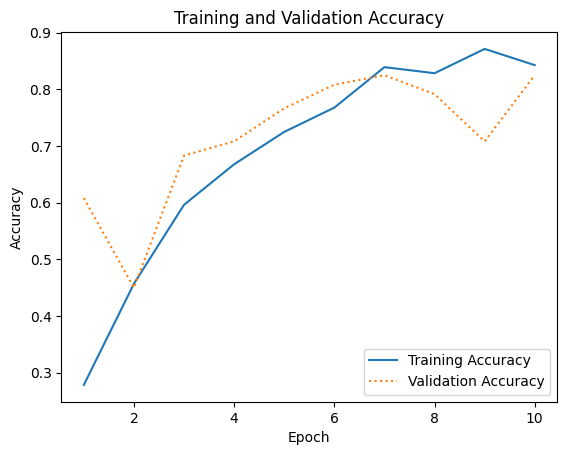

In [15]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 800ms/step


In [18]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3956 - loss: 84.1196 - val_accuracy: 0.7833 - val_loss: 14.9829
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8585 - loss: 4.8849 - val_accuracy: 0.8917 - val_loss: 2.2100
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9807 - loss: 0.4582 - val_accuracy: 0.9417 - val_loss: 0.9865
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 731ms/step - accuracy: 0.9782 - loss: 0.3697 - val_accuracy: 0.9500 - val_loss: 2.2093
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 755ms/step - accuracy: 0.9932 - loss: 0.1214 - val_accuracy: 0.9417 - val_loss: 1.8566
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 706ms/step - accuracy: 0.9987 - loss: 0.0028 - val_accuracy: 0.9500 - val_loss: 2.1047
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 724ms/step - accuracy: 0.9920 - loss: 0.0386 - val_accuracy: 0.9500 - val_loss: 2.1396
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 687ms/step - accuracy: 0.9947 - loss: 0.0457 - val_accuracy: 0

[]

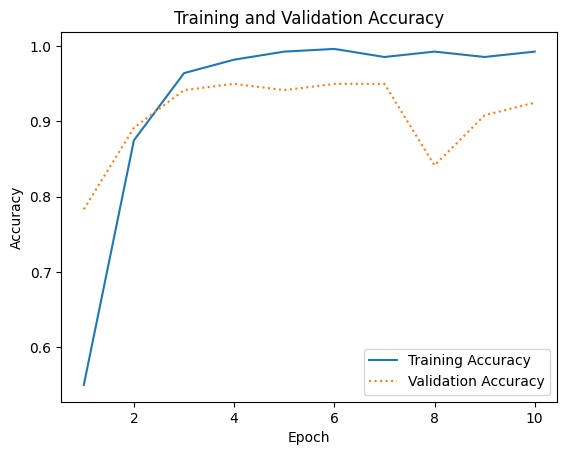

In [20]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


Text(110.44999999999997, 0.5, 'Actual label')

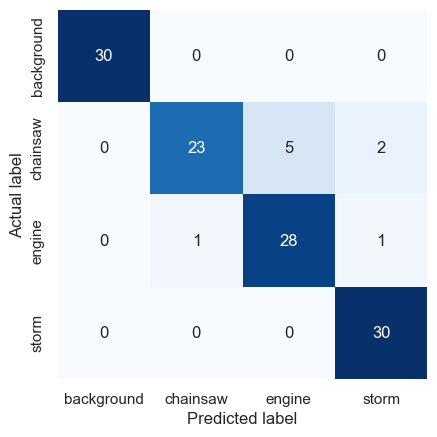

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['background', 'chainsaw', 'engine', 'storm']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

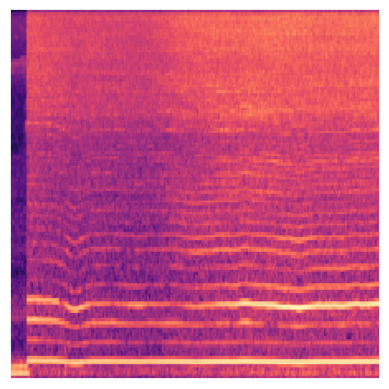

In [24]:
create_spectrogram('Sounds/samples/sample1.wav', 'Spectrograms/sample1.png')

x = image.load_img('Spectrograms/sample1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [25]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
background: 0.0
chainsaw: 1.0
engine: 1.1179641954217098e-19
storm: 0.0
